## Install and Import Dependencies

In [19]:
conda install -c conda-forge imutils

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::transformers==4.18.0=py37hecd8cb5_0
done

## Package Plan ##

  environment location: /Users/mohamedsaad/opt/anaconda3/envs/RDN

  added / updated specs:
    - imutils


The following NEW packages will be INSTALLED:

  pytorch            pkgs/main/osx-64::pytorch-1.10.2-cpu_py37h903acac_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [20]:
conda update -n base conda

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [22]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## Read in Image, Grayscale

In [23]:
#img = img.astype('uint8')

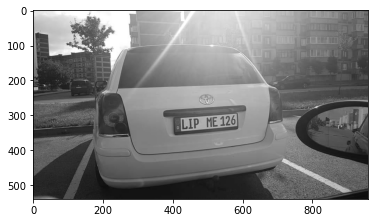

In [64]:
img = cv2.imread('image11.webp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

#  Apply filter and find edges for localization

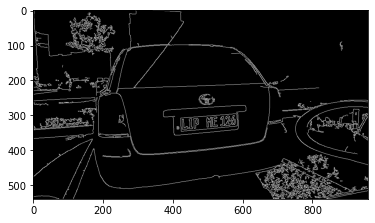

In [65]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

##  Find Contours and Apply Mask

In [66]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [67]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [68]:
location

array([[[584, 299]],

       [[423, 308]],

       [[424, 346]],

       [[584, 331]]], dtype=int32)

In [69]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

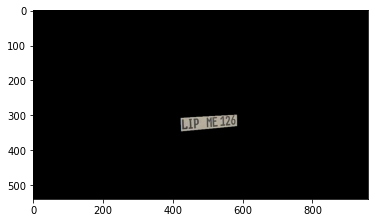

In [70]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [71]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

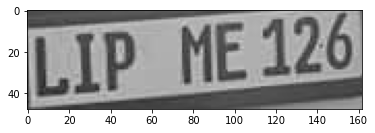

In [72]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## Use Easy OCR To Read Text

In [73]:
reader1 = easyocr.Reader(['en'])
result1 = reader1.readtext(cropped_image)
result1

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [162, 0], [162, 48], [0, 48]], 'LIP ME126', 0.582615789130925)]

## Render Result

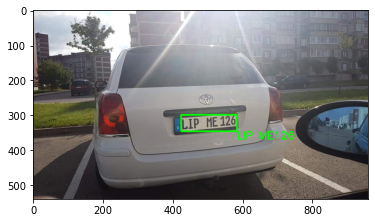

In [74]:
text = result1[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))